In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier

# check if xgb is installed, then import
try:
    import xgboost as xgb
except Exception as e:
    print(f"XGBoost may not be installed, or has an issue. Error: {e}")

XGBoost may not be installed, or has an issue. Error: No module named 'xgboost'


In [2]:
file_path = "survey_2023_transformed.csv"
df = pd.read_csv(file_path)

print(list(df.columns))

['how_long_have_you_worked_for_your_current_employer', 'which_of_the_following_groups_best_describes_your_employment_level', "approximately_what_is_the_size_of_your_employer's_workforce", 'i_pursue_job_opportunities_even_if_i_do_not_fulfill_all_of_the_requirements_on_a_job_description', 'which_of_the_following_groups_best_describes_the_organization_that_you_work_for', 'leadership_opportunities', 'i_let_my_manager_know_what_i_want_with_the_expectation_that_it_will_generate_growth_opportunities', 'i_avoid_discussions_about_salary_and_incentives', 'what_country_do_you_currently_live_in', 'i_trust_that_i_am_compensated_appropriately_for_my_accomplishments', 'family_commitments', 'recognition_from_colleaguespeers', 'yes_one_or_more_children', 'socialize_with_peers_within_my_company']


In [3]:
df

,how_long_have_you_worked_for_your_current_employer,which_of_the_following_groups_best_describes_your_employment_level,approximately_what_is_the_size_of_your_employer's_workforce,i_pursue_job_opportunities_even_if_i_do_not_fulfill_all_of_the_requirements_on_a_job_description,which_of_the_following_groups_best_describes_the_organization_that_you_work_for,leadership_opportunities,i_let_my_manager_know_what_i_want_with_the_expectation_that_it_will_generate_growth_opportunities,i_avoid_discussions_about_salary_and_incentives,what_country_do_you_currently_live_in,i_trust_that_i_am_compensated_appropriately_for_my_accomplishments,family_commitments,recognition_from_colleaguespeers,yes_one_or_more_children,socialize_with_peers_within_my_company
0,1,1,1,2,8,1,2,1,10,1,1,2,0,1
1,1,2,1,2,5,2,1,1,10,2,0,2,0,1
2,1,1,1,2,7,2,2,2,10,2,1,2,1,1
3,0,1,1,2,5,1,1,1,10,1,1,2,1,1
4,0,1,1,2,7,1,2,1,10,1,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,0,2,2,0,1,2,2,1,10,1,1,2,0,1
1396,0,1,1,2,6,1,1,2,10,1,0,1,0,0
1397,1,2,1,0,5,2,0,2,10,1,0,2,1,0
1398,1,2,1,0,7,2,2,1,9,2,1,2,1,1



classification report:
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       301
           1       0.52      0.49      0.50       119

    accuracy                           0.73       420
   macro avg       0.66      0.66      0.66       420
weighted avg       0.72      0.73      0.73       420


top features:
which_of_the_following_groups_best_describes_the_organization_that_you_work_for                      0.128471
what_country_do_you_currently_live_in                                                                0.121313
i_pursue_job_opportunities_even_if_i_do_not_fulfill_all_of_the_requirements_on_a_job_description     0.099945
which_of_the_following_groups_best_describes_your_employment_level                                   0.099658
leadership_opportunities                                                                             0.073660
i_avoid_discussions_about_salary_and_incentives                                     

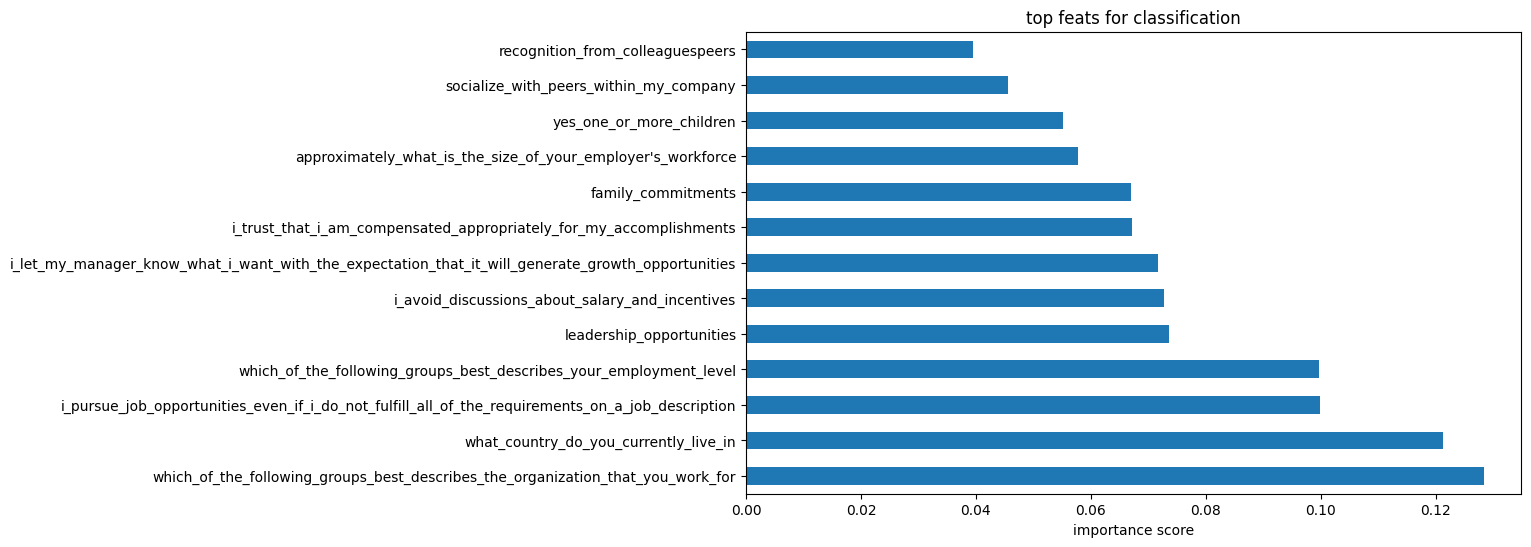

In [ ]:
# "how_long_have_you_worked_for_your_current_employer?"
# 1       Less than 1 year 10%
# 2       1 to 5 years 37%
# 3       6 to 10 years 20%
# 4       11 to 20 years 21%
# 5       21 years or more 10%
# 0       (missing, ignore these)

# recode to
# <= 10 years 0
# > 10 years 1

target = "how_long_have_you_worked_for_your_current_employer"

if target not in df.columns:
    print(f"target column '{target}' not found in selected features.")
else:
    # drop rows where target is 0
    subset_for_class = [
        'which_of_the_following_groups_best_describes_your_employment_level',
        "approximately_what_is_the_size_of_your_employer's_workforce",
        'i_pursue_job_opportunities_even_if_i_do_not_fulfill_all_of_the_requirements_on_a_job_description',
        'which_of_the_following_groups_best_describes_the_organization_that_you_work_for',
        'leadership_opportunities',
        'i_let_my_manager_know_what_i_want_with_the_expectation_that_it_will_generate_growth_opportunities',
        'i_avoid_discussions_about_salary_and_incentives',
        'what_country_do_you_currently_live_in',
        'i_trust_that_i_am_compensated_appropriately_for_my_accomplishments',
        'family_commitments',
        'recognition_from_colleaguespeers',
        'yes_one_or_more_children',
        'socialize_with_peers_within_my_company'
        ]

    df_classification = df.dropna(subset=[target])
    X = df_classification.drop(columns=[target])[subset_for_class]
    y = df_classification[target]

    # binarize any feature with 6 unique values
    for col in X.columns:
        if len(X[col].unique()) == 6:
            print(col)
            # 1 if X[col] >= 3 else 0
            X[col] = X[col].apply(lambda x: 1 if x >= 3 else 0)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    if 'xgboost' in globals():
        clf = xgb.XGBClassifier(random_state=42)
        clf.fit(X_train, y_train)
    else:
        clf = RandomForestClassifier(random_state=42)
        clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    print("\nclassification report:")
    print(classification_report(y_test, y_pred))

    feature_importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
    print("\ntop features:")
    print(feature_importances.head(50))

    plt.figure(figsize=(10, 6))
    feature_importances.head(20).plot(kind='barh')
    plt.title("top feats for classification")
    plt.xlabel("importance score")
    plt.show()


In [5]:
# cartesian product of unique values in data
all_unique_counts = []
for col in X.columns:
    print(f"{col}: {X[col].unique()}")
    all_unique_counts.append(len(X[col].unique()))

# cartesian product multiplies all these
print(f"cartesian product of all unique values: {np.prod(all_unique_counts)}")


which_of_the_following_groups_best_describes_your_employment_level: [1 2 0]
approximately_what_is_the_size_of_your_employer's_workforce: [1 0 2]
i_pursue_job_opportunities_even_if_i_do_not_fulfill_all_of_the_requirements_on_a_job_description: [2 1 0]
which_of_the_following_groups_best_describes_the_organization_that_you_work_for: [8 5 7 4 1 9 6 2 3 0]
leadership_opportunities: [1 2 0]
i_let_my_manager_know_what_i_want_with_the_expectation_that_it_will_generate_growth_opportunities: [2 1 0]
i_avoid_discussions_about_salary_and_incentives: [1 2 0]
what_country_do_you_currently_live_in: [10  9  4  1  2  3  7  6  5  8]
i_trust_that_i_am_compensated_appropriately_for_my_accomplishments: [1 2 0]
family_commitments: [1 0]
recognition_from_colleaguespeers: [2 1 0]
yes_one_or_more_children: [0 1]
socialize_with_peers_within_my_company: [1 0]
cartesian product of all unique values: 5248800
